In [17]:
import function as f

### prev

In [18]:
directory_path = '../Simulation/Assets/Results/Congestion'
x_label = 'alpha 1'
y_label = 'Congestion ratio'
title = 'Congestion ratio by alphas'
col_num = 3
prev_or_now = 'prev'
y_lim = 0.5
fig_size = (26, 3)

f.create_subplot_congestion(directory_path, prev_or_now, x_label, y_label, title, col_num, y_lim, fig_size)

TypeError: create_subplot_congestion() takes 7 positional arguments but 8 were given

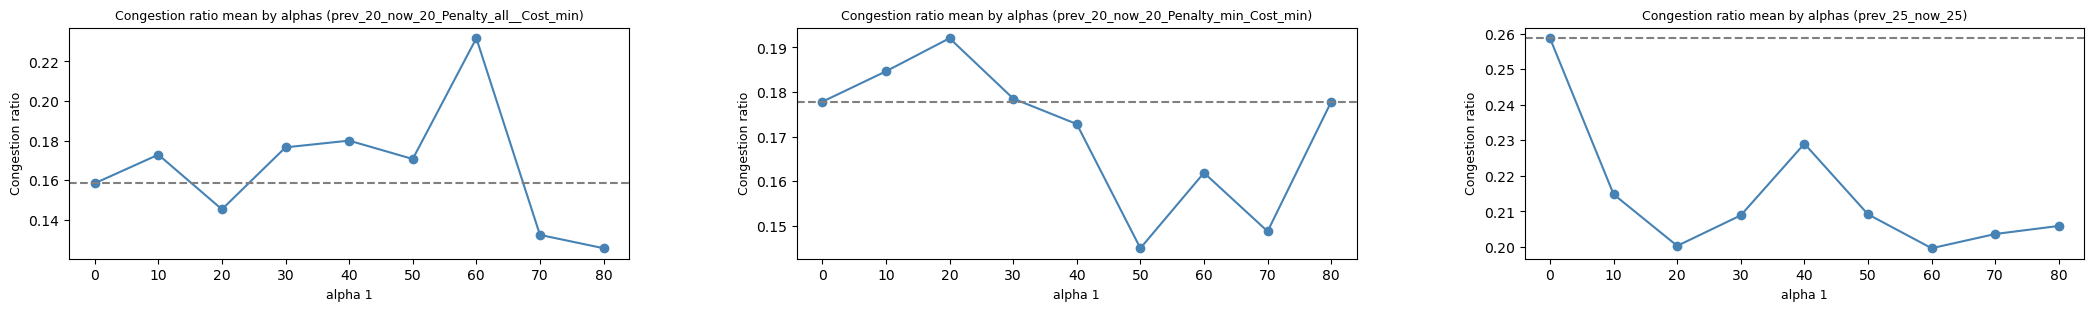

In [16]:
directory_path = '../Simulation/Assets/Results/Congestion'
x_label = 'alpha 1'
y_label = 'Congestion ratio'
title = 'Congestion ratio mean by alphas'
col_num = 3
prev_or_now = 'prev'
fig_size = (26, 3)

f.subplot_congestion_avg(directory_path, prev_or_now, x_label, y_label, title, col_num, fig_size)

### now

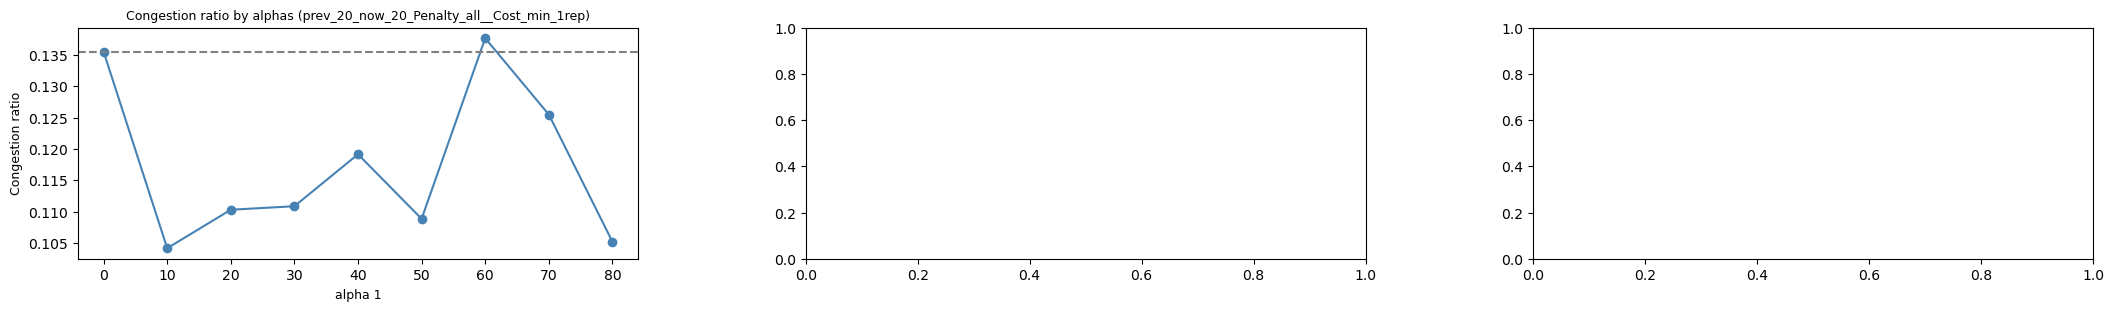

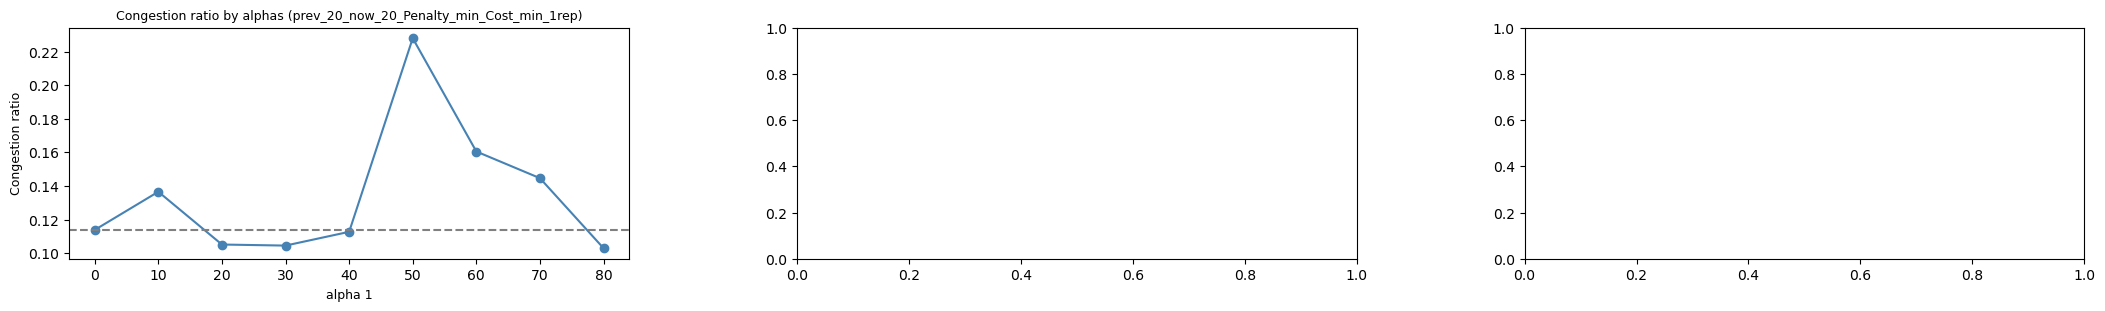

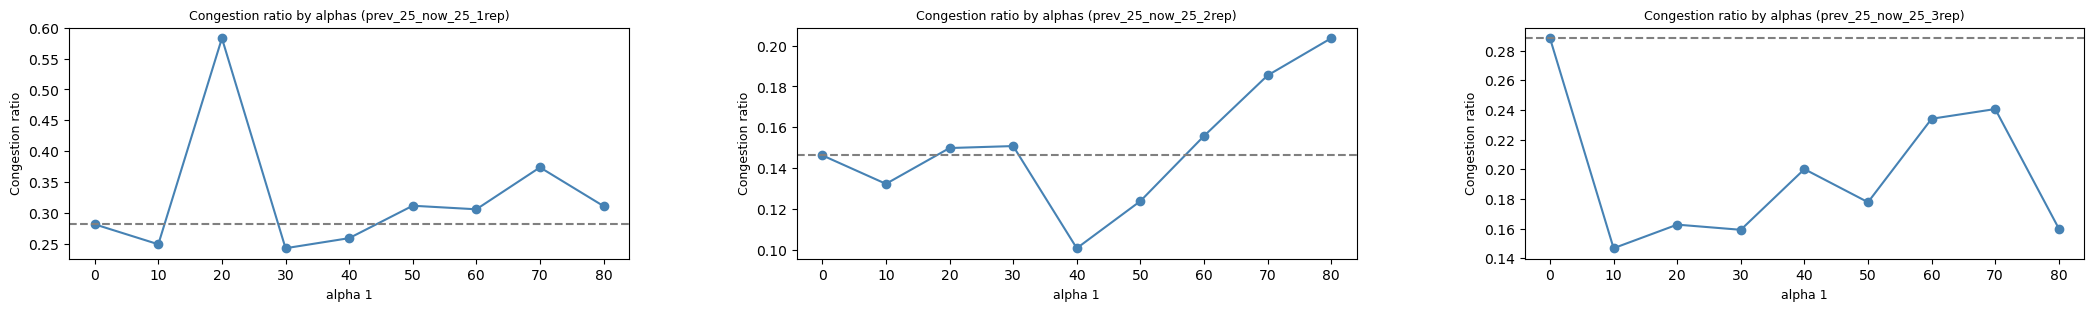

In [13]:
directory_path = '../Simulation/Assets/Results/Congestion'
x_label = 'alpha 1'
y_label = 'Congestion ratio'
title = 'Congestion ratio by alphas'
col_num = 3
prev_or_now = 'now'
fig_size = (26, 3)

f.create_subplot_congestion(directory_path, prev_or_now, x_label, y_label, title, col_num, fig_size)

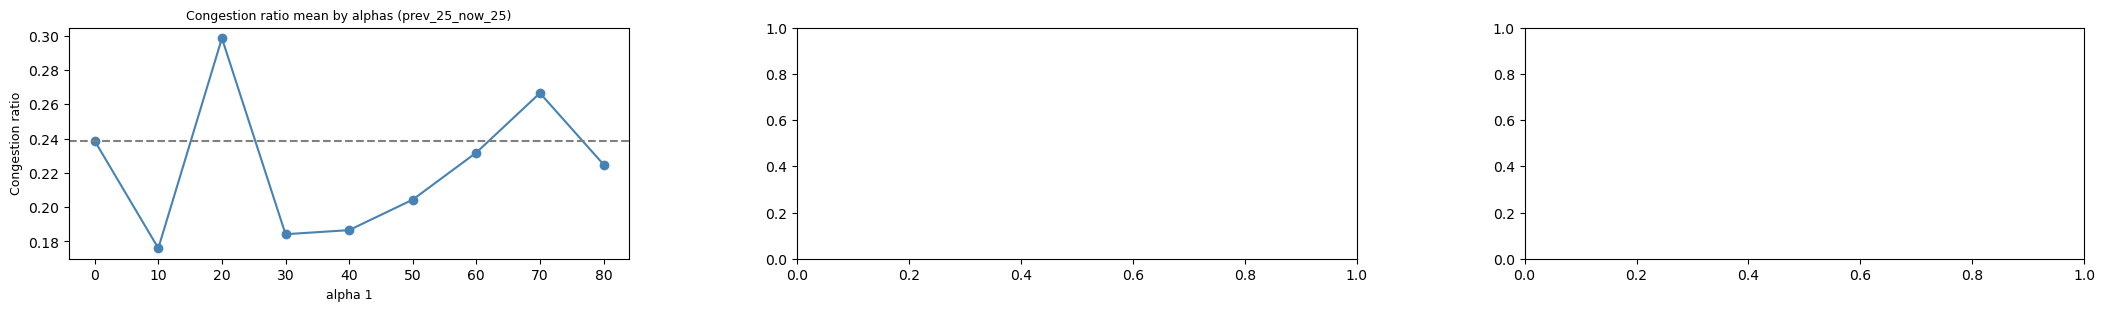

In [5]:
directory_path = '../Simulation/Assets/Results/Congestion'
x_label = 'alpha 1'
y_label = 'Congestion ratio'
title = 'Congestion ratio mean by alphas'
col_num = 3
prev_or_now = 'now'
fig_size = (26, 3)

f.subplot_congestion_avg(directory_path, prev_or_now, x_label, y_label, title, col_num, fig_size)